#TC1002s - CS Tool - Mastering Analytics
#Activity 4 - Heatmaps and boxplots
##Noel Sebastian Marquez Tovar - A01659730
##Angel Guillermo Bosquez Baltazar - A01667100


To use this file simply drag the Video_Games.csv incldued in Github to the Archivos(Files) Section

#Heatmaps


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

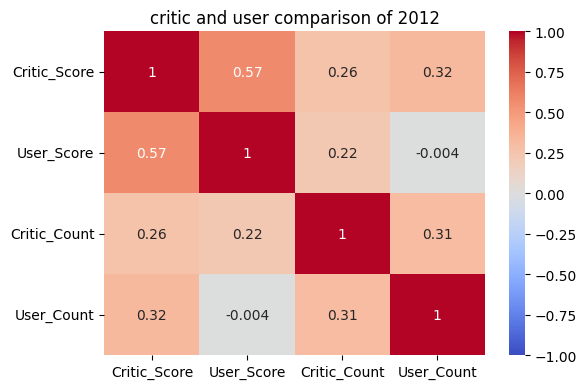

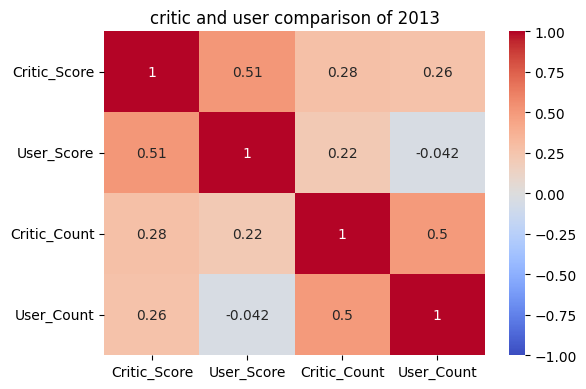

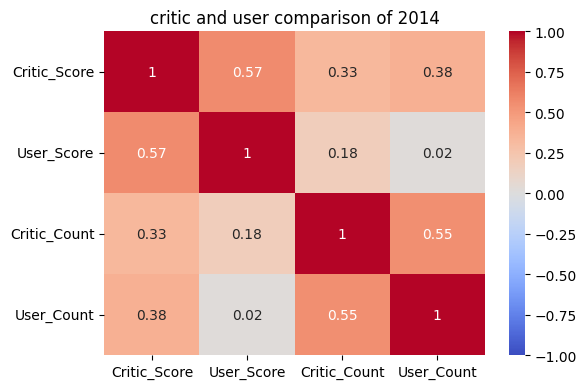

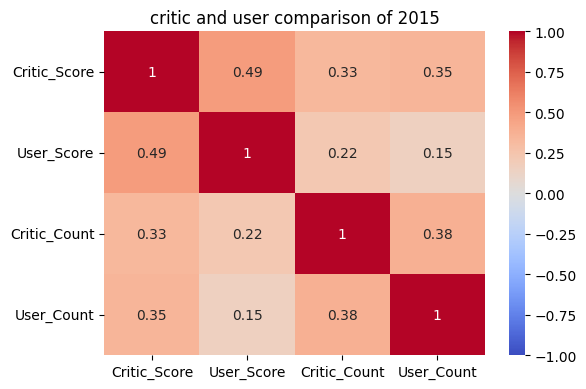

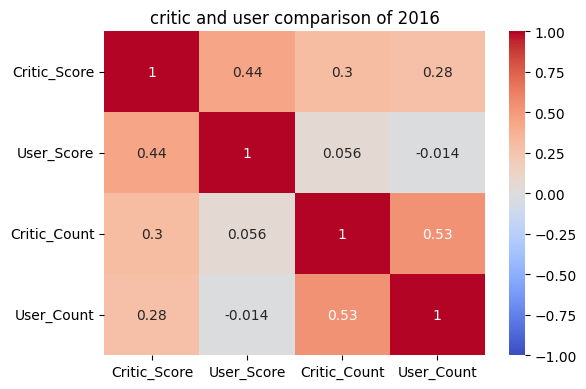

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("Video_Games.csv")
df.info()

#convert and cleans data to use
df["User_Score"] = pd.to_numeric(df["User_Score"], errors='coerce')
df["Year_of_Release"] = pd.to_numeric(df["Year_of_Release"], errors='coerce')

#we define the columns we will include
columns = ["Critic_Score", "User_Score", "Critic_Count", "User_Count"]

#with a for cycle, we interate over the years
for year in range(2012, 2018):
    df_year = df[df["Year_of_Release"] == year][columns].dropna()
    if df_year.empty:
        continue  # Skip if no data
    corr = df_year.corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"critic and user comparison of {year}")
    plt.tight_layout()
    plt.show()


<ipython-input-12-f7279c8b3c7e>:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([d[col].dropna() for col in columns_to_plot],


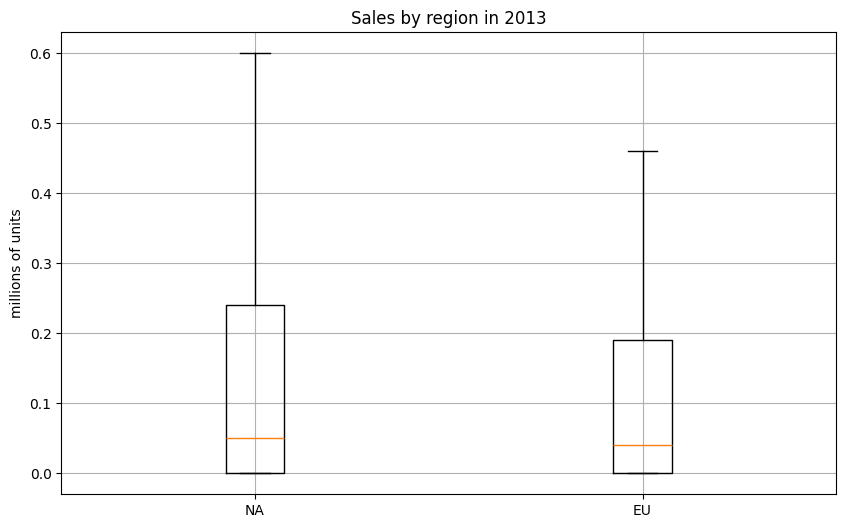

In [ ]:
import matplotlib.pyplot as plt

#We compare videogames released in 2013
d = df[df["Year_of_Release"] == 2013]

#colums of regions to compare
columns_to_plot = ["NA_Sales", "EU_Sales"]

plt.figure(figsize=(10, 6))
plt.boxplot([d[col].dropna() for col in columns_to_plot],
            labels=["NA", "EU"],
            showfliers=False)  #we take out massive sellers like CoD and FIFA to get better results

plt.title("Sales by region in 2013")
plt.ylabel("millions of units")
plt.grid(True)
plt.show()

#Are there any variables that do not provide information?
##User count and user score in 2012 and 2013 show almost no correlation, this can translate in other variables not contributing in the clustering process.

#If you had to eliminate variables, which ones would you remove and why?
##User_Count is a good candidate for elimination, it has low correlation with the other variables througout the years

#Are there any variables with unusual data?
##The boxplot for 2013 show high outliers, maybe some games dominate the market

#If you compare the variables, are they all in similar ranges?
##No, sales variables are measured in millions, while critic and user scores use ranges from 0 to 100 or 0 to 10, that's why scaling up or down is important

#Do you think this affects the data analysis? Can you find any similar groups? What are these groups?
##Absolutely. If left unscaled
 Variables with larger numerical ranges (like sales or counts) would dominate the distance calculations in clustering or regression models.
 This would make the analysis biased toward those features.
Can you find any similar groups? What are these groups?

Yes — the heatmaps show consistent moderate-to-strong positive correlations between

Critic_Score and User_Score (between 0.44–0.57), suggesting alignment between critic and user opinions.

Critic_Count and User_Count, especially after 2013, suggesting that popular games get attention from both sides.

These patterns help identify groupings like:
Critically acclaimed games (high Critic_Score, Critic_Count).
User favorites (high User_Score and User_Count).
Low-engagement titles (low scores and count on all fronts).

Answers A01659730 Seb Mar
Are there any variables that do not provide information?

Yes, in years like 2012 and 2013, User_Count and User_Score show little to no correlation, which suggests that some variables may not meaningfully influence the clustering.

If you had to eliminate variables, which ones would you remove and why?

User_Count is a strong candidate for removal. It consistently shows weak correlation with other metrics across the dataset

Are there any variables with unusual data?

Yes, especially in 2013, the boxplots reveal significant outliers.

Do you think this affects the data analysis? Can you find any similar groups? What are these groups?

Absolutely—ignoring scaling causes variables with large values (like sales) to overpower others in clustering or regression, leading to biased groupings.

After scaling, clear patterns emerge. For example:

Critic_Count and User_Count become more aligned post-2013, implying popular games are widely reviewed on both fronts.

These patterns help define groups such as:

User favorites (high User_Score and User_Count), and Low-engagement games (low in both score and count).